<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/SROL5_NR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get SROL5 Model and Neuron_reduce

In [1]:
NR=True # set True to use original neuron_reduce, False for test_neuron_reduce

In [2]:
# !git clone https://github.com/orena1/neuron_reduce

In [3]:
!git clone https://github.com/davidfague/Stylized-ReducedOrder-L5-Model.git

%cd Stylized-ReducedOrder-L5-Model/

!pip install neuron
from neuron import h,nrn,gui
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import time
from io import StringIO
import os, sys
from typing import Optional, List, Tuple, Union
from functools import partial
import scipy.signal as ss
import scipy.stats as st
import h5py
import matplotlib.pyplot as plt
import math
from utils.plot_results import plot_LFP_traces,plot_LFP_heatmap
from utils.plot_morphology import plot_morphology
import re

from __future__ import division

if NR == True:
  !pip install neuron_reduce
  import neuron_reduce
  from neuron_reduce import subtree_reductor
else:
  # try to use the test_neuron_reduce from my github
  from test_neuron_reduce.subtree_reductor_func import subtree_reductor

fatal: destination path 'Stylized-ReducedOrder-L5-Model' already exists and is not an empty directory.
/content/Stylized-ReducedOrder-L5-Model
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%ls

 analyze_area.py
 batch_run.sh
 Create_NR_Geometry.ipynb
 exc_stim_spikes.h5
 geom_NR_test.csv
 geom_parameters.csv
 geom_parameters_old.csv
 geom_parameters_oldL5Morphology.csv
 geom_reduced.csv
 geom_standard.csv
'HOC Detailed Model'/
 L5Morphologies/
 mechanisms/
 NMDAExploration.ipynb
 NMDAExploration_reduced.ipynb
 Notebooks/
 NR_test/
'Old Notebooks'/
 output_control/
 Passive_Properties.ipynb
 Plots/
 README.md
 Rhythmic_and_Arrhythmic_modulation.ipynb
 Rhythmic_Input.ipynb
 RhythmicSpikeTrains.ipynb
 run_all_tests.py
 ScriptedSROL5.ipynb
 Segment_Axial_Currents.ipynb
 Server/
 Soma_Axial_Currents.ipynb
 SROC_Active_Properties.ipynb
 SROC_Passive_Active_Properties.ipynb
 SROC_Passive_Properties.ipynb
 SROL5/
 SROL5_analysis.ipynb
 SROL5.ipynb
 SROL5_NR.ipynb
'SROL5 with raster.ipynb'
 stylized_module/
 Stylized_Reduced_Order_L5_14.ipynb
 Stylized_Reduced_Order_L5.ipynb
 templates/
 test_neuron_reduce/
 tests/
 test_script_helper.py
 utils/


In [5]:
#refresh github
import shutil
%cd ..
shutil.rmtree('Stylized-ReducedOrder-L5-Model/') #removes folder
!git clone https://github.com/davidfague/Stylized-ReducedOrder-L5-Model.git
%cd Stylized-ReducedOrder-L5-Model/

/content
Cloning into 'Stylized-ReducedOrder-L5-Model'...
remote: Enumerating objects: 2005, done.
remote: Counting objects: 100% (2005/2005), done.
remote: Compressing objects: 100% (988/988), done.
remote: Total 2005 (delta 999), reused 1989 (delta 989), pack-reused 0
Receiving objects: 100% (2005/2005), 119.15 MiB | 17.26 MiB/s, done.
Resolving deltas: 100% (999/999), done.
Updating files: 100% (643/643), done.
/content/Stylized-ReducedOrder-L5-Model


In [6]:
#run all tests

%run run_all_tests.py # iteratively constructs system arguments to run test_script for each experiment

python /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 0 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_0.txt True True basic 37
python /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 10 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_10.txt True True basic 37
python /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_

['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc', 'model.hoc', '0', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_0.txt', 'True', 'True', 'basic', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 0
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_0.txt
vvvvvvvvvvvvvvvvv

Running simulations, temperature is 37.0c


--------------- unit test results --------------
UNIT TEST PASSED: no significant changes to voltage vectors

Complex model: unit test V - current sim V : 0.0
Reduced model: unit test V - current sim V : 0.0
current sim: rmsd between reduced vs complex model: 0.26005757163699345
unit test: rmsd between reduced vs complex model: 0.26005757163699345
rmsd between current sim reduced and unit test reduced : 0.0


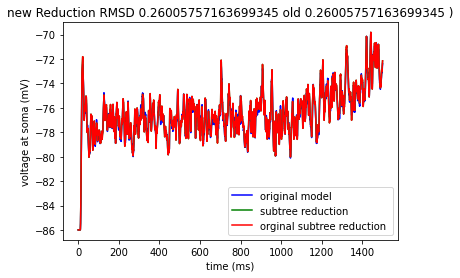

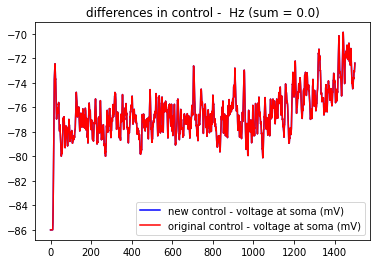

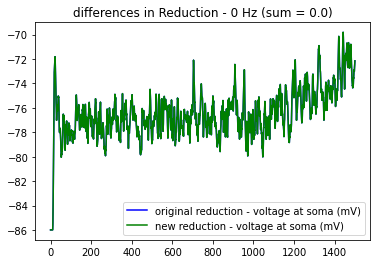

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [7]:
# call a system argument
# have to change python to %run for jupyter notebook

%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 0 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_0.txt True True basic 37

['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc', 'model.hoc', '10', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_10.txt', 'True', 'True', 'basic', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 10
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_10.txt
vvvvvvvvvvvvv

Running simulations, temperature is 37.0c


--------------- unit test results --------------
UNIT TEST PASSED: no significant changes to voltage vectors

Complex model: unit test V - current sim V : 0.0
Reduced model: unit test V - current sim V : 0.0
current sim: rmsd between reduced vs complex model: 0.25923536348620674
unit test: rmsd between reduced vs complex model: 0.25923536348620674
rmsd between current sim reduced and unit test reduced : 0.0


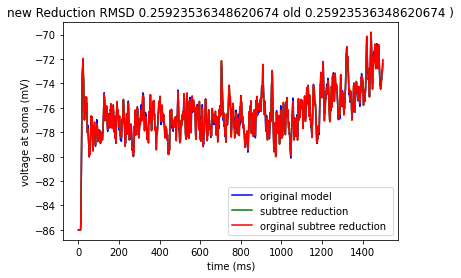

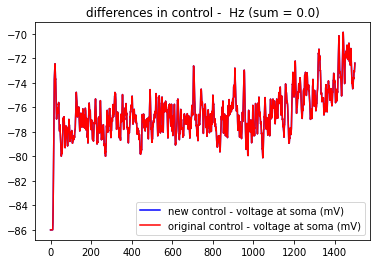

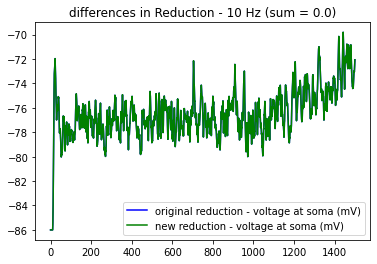

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [8]:
#test 2
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 10 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_10.txt True True basic 37


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc', 'model.hoc', '38', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_38.txt', 'True', 'True', 'basic', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 38
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_38.txt
vvvvvvvvvvvvv

Running simulations, temperature is 37.0c


--------------- unit test results --------------
UNIT TEST PASSED: no significant changes to voltage vectors

Complex model: unit test V - current sim V : 0.0
Reduced model: unit test V - current sim V : 0.0
current sim: rmsd between reduced vs complex model: 0.25674773766888503
unit test: rmsd between reduced vs complex model: 0.25674773766888503
rmsd between current sim reduced and unit test reduced : 0.0


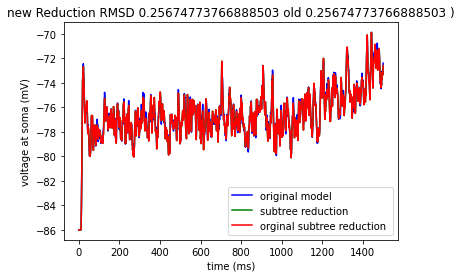

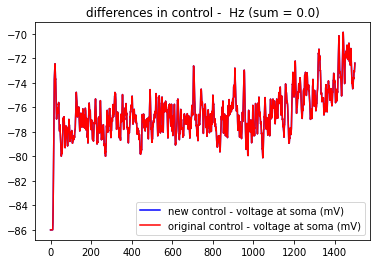

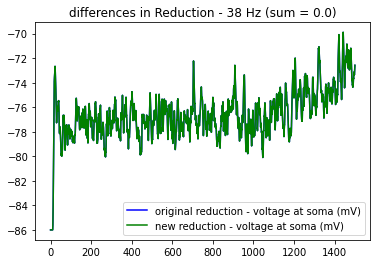

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [9]:
#test3_a71075_passive
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 38 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_38.txt True True basic 37


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc', 'model.hoc', '200', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_200.txt', 'True', 'True', 'basic', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 200
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_200.txt
vvvvvvvvv

Running simulations, temperature is 37.0c


--------------- unit test results --------------
UNIT TEST PASSED: no significant changes to voltage vectors

Complex model: unit test V - current sim V : 0.0
Reduced model: unit test V - current sim V : 0.0
current sim: rmsd between reduced vs complex model: 0.283932671056867
unit test: rmsd between reduced vs complex model: 0.283932671056867
rmsd between current sim reduced and unit test reduced : 0.0


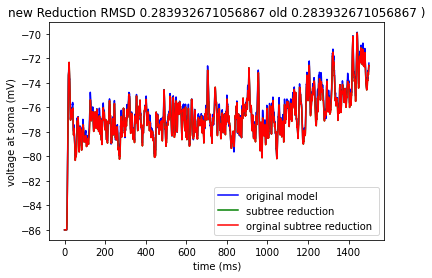

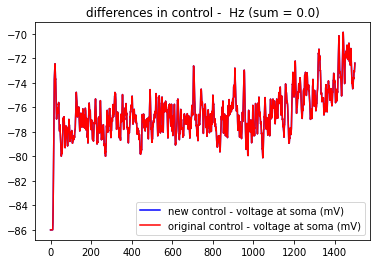

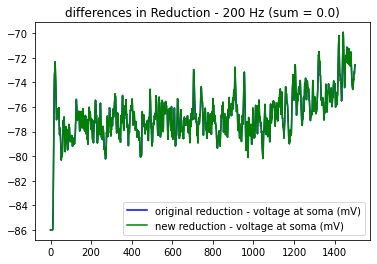

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [10]:
#test4_amsalem_2016
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/model.hoc model.hoc 200 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_1/voltage_vectors_for_unit_test_200.txt True True basic 37

['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_2/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_2/model.hoc', 'model.hoc', '38', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_2/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_2/voltage_vectors_for_unit_test.txt', 'True', 'True', 'basic', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 38
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/model.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/2013_03_06_cell08_876_H41_05_Cell2.ASC
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/voltage_vectors_for_unit_test.txt
vvvvvvvvvvvvvvvvvvv

Running simulations, temperature is 37.0c


--------------- unit test results --------------
UNIT TEST PASSED: no significant changes to voltage vectors

Complex model: unit test V - current sim V : 0.0
Reduced model: unit test V - current sim V : 0.0
current sim: rmsd between reduced vs complex model: 0.25674773766888503
unit test: rmsd between reduced vs complex model: 0.25674773766888503
rmsd between current sim reduced and unit test reduced : 0.0


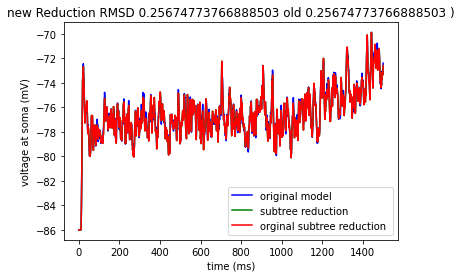

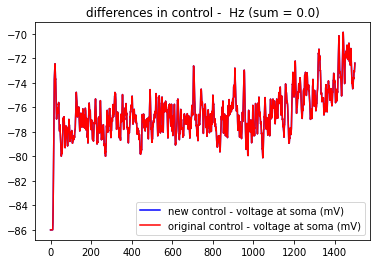

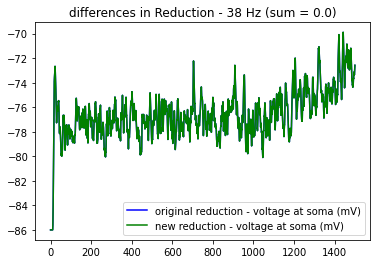

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [11]:
#test5_Hay_2011_active_dendrite
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/model.hoc model.hoc 38 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_2/voltage_vectors_for_unit_test.txt True True basic 37


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_3/dend-C050800E2_cor_axon-C120398A-P2_-_Scale_x1.000_y1.050_z1.000_-_Clone_81.asc', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_3/cADpyr230_L4_SS_4_dend_C050800E2_cor_axon_C120398A_P2___Scale_x1_000_y1_050_z1_000___Clone_81.hoc', 'model.hoc', '38', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_3/synapse_fromh5a71075.txt', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_3/voltage_vectors_for_unit_test.txt', 'True', 'True', 'bbp', '34']
---------------sim data --------------------------
REDUCTION_FREQUENCY 38
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/cADpyr230_L4_SS_4_dend_C050800E2_cor_axon_C120398A_P2___Scale_x1_000_y1_050_z1_000___Clone_81.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/synapse_fromh5a71075.txt
MORPHOLOGY_FILE     /content/Stylized-ReducedO

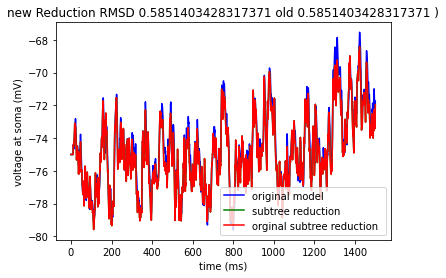

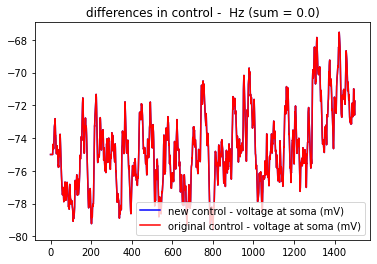

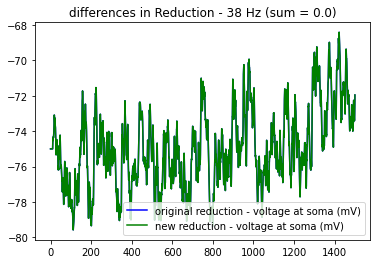

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [12]:
#test6_L4_LBC_cNAC187_5_for_run
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/dend-C050800E2_cor_axon-C120398A-P2_-_Scale_x1.000_y1.050_z1.000_-_Clone_81.asc /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/cADpyr230_L4_SS_4_dend_C050800E2_cor_axon_C120398A_P2___Scale_x1_000_y1_050_z1_000___Clone_81.hoc model.hoc 38 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/synapse_fromh5a71075.txt /content/Stylized-ReducedOrder-L5-Model/tests/Test_3/voltage_vectors_for_unit_test.txt True True bbp 34


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/C230300D1.asc', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/cNAC187_L23_LBC_3_C230300D1_new_new_fit.hoc', 'model.hoc', '9', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/synapse_fromh5a71075.txt', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/voltage_vectors_for_unit_test.txt', 'True', 'True', 'bbpactive', '34']
---------------sim data --------------------------
REDUCTION_FREQUENCY 9
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/cNAC187_L23_LBC_3_C230300D1_new_new_fit.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/synapse_fromh5a71075.txt
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/C230300D1.asc
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /c

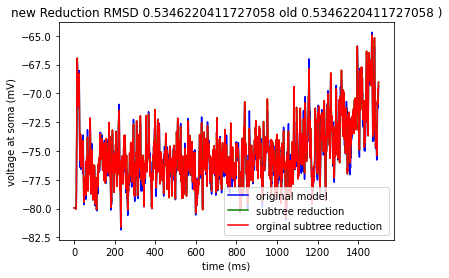

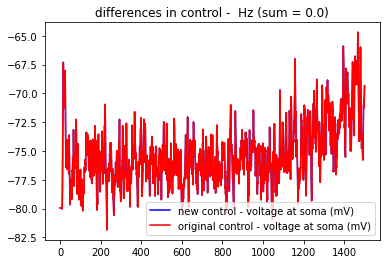

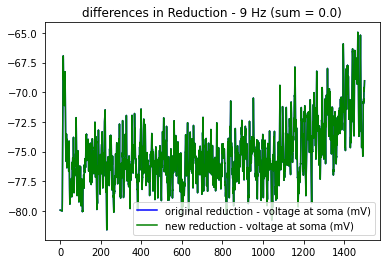

--------------------------------------- END -----------------------------------


<Figure size 432x288 with 0 Axes>

In [13]:
#test7_Almog_Korngreen_2014
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/C230300D1.asc /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/cNAC187_L23_LBC_3_C230300D1_new_new_fit.hoc model.hoc 9 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/synapse_fromh5a71075.txt /content/Stylized-ReducedOrder-L5-Model/tests/Test_4_LBC_amsalem/voltage_vectors_for_unit_test.txt True True bbpactive 34


In [14]:
#test8_Marasco_Limongiello_Migliore_2012
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/cell1.asc /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/L5PCtemplate.hoc model.hoc 38 -1 /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/origRandomSynapses-10000 /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/voltage_vectors_for_unit_test.txt True True hay 37


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/cell1.asc', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/L5PCtemplate.hoc', 'model.hoc', '38', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/origRandomSynapses-10000', '/content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/voltage_vectors_for_unit_test.txt', 'True', 'True', 'hay', '37']
---------------sim data --------------------------
REDUCTION_FREQUENCY 38
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/L5PCtemplate.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/origRandomSynapses-10000
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/cell1.asc
MANUAL_TOTAL_NSEGS  -1
VOLTAGEFILE         /content/Stylized-ReducedOrder-L5-Model/tests/Test_5_Hay_2011/voltage_vectors_for_unit_te

NEURON: The user defined name already exists: CaDynamics_E2
 near line 0
 {dend[6] all.append()}
                       ^
        nrn_load_dll("x86_64/.li...")


RuntimeError: ignored

In [15]:
#test9_model_48310820
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc model.hoc 0 -1 /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/voltage_vectors_for_unit_test_0.txt True True bbpnew 34


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc', 'model.hoc', '0', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/voltage_vectors_for_unit_test_0.txt', 'True', 'True', 'bbpnew', '34']
---------------sim data --------------------------
REDUCTION_FREQUENCY 0
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_0

NEURON: The user defined name already exists: CaDynamics_E2
 near line 0
 ^
        nrn_load_dll("x86_64/.li...")


RuntimeError: ignored

In [16]:
#test10_model_47804508
%run /content/Stylized-ReducedOrder-L5-Model/test_script_helper.py /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_05_Cell2.ASC /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc model.hoc 0 -1 /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/voltage_vectors_for_unit_test_0.txt True True bbpnew 34


['/content/Stylized-ReducedOrder-L5-Model/test_script_helper.py', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_05_Cell2.ASC', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc', 'model.hoc', '0', '-1', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt', '/content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/voltage_vectors_for_unit_test_0.txt', 'True', 'True', 'bbpnew', '34']
---------------sim data --------------------------
REDUCTION_FREQUENCY 0
MODEL_FILE          /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/cNAC187_L4_LBC_8e834c24cb.hoc
MODEL_FILE_REDUCED  model.hoc
SYNAPSE_FILE        /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/1487081844_732516.txt
MORPHOLOGY_FILE     /content/Stylized-ReducedOrder-L5-Model/tests/L4_LBC_cNAC187_5_for_run/2013_03_06_cell08_876_H41_0

NEURON: The user defined name already exists: CaDynamics_E2
 near line 0
 ^
        nrn_load_dll("x86_64/.li...")


RuntimeError: ignored

In [17]:
#test11_human_Eyal_2016
%run 


%run:
 Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allows 

/usr/local/lib/python3.8/dist-packages/IPython/core/magics/execution.py:699: UserWarning: you must provide at least a filename.
  warn('you must provide at least a filename.')


In [18]:
mechanisms_path = 'mechanisms'  # need to compile the folder first
geometry_file = 'geom_parameters.csv'
# geometry_file = 'geom_NR_test.csv' # test simple geometry

tstop = 1000  # ms simulation duration
dt = 0.1  # ms. does not allow change

h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join(mechanisms_path,'nrnmech.dll'))  # running this line more than once might crash the kernel
h.nrn_load_dll(os.path.join(mechanisms_path,'x86_64/.libs/libnrnmech.so'))  # use this line instead in Linux
geo_standard = pd.read_csv(geometry_file,index_col='id')
h.tstop = tstop
h.dt = dt
h.steps_per_ms = 1/h.dt

#pick a random seed to initalize random values
import random
random.seed(427)

FileNotFoundError: ignored

In [ ]:
from SROL5.build_model import Simulation
# from stylized_module.ecp import EcpMod, newposition
# from stylized_module.recorder import Recorder
# from stylized_module.point_current import Point_current

#Define Cell Orientation, Biophysics, and Geometry

In [ ]:
x = np.zeros(96)
y = np.linspace(-1900,1900,96)
z = np.zeros(96)
elec_pos = pos = np.column_stack((x,y,z))

#choose orientation of neuron
loc_param = [50,0,10,0,1,0]  # example position #D: initially this was [0,0,50,0.2,0.75,1.5], (x,y,z,theta,h,phi), h=[-1,1] phi=[-pi,pi] h=.7071067812 for 90 deg
#note on parameters: Rotate(alpha,h,phi): first rotate alpha about y-axis (spin), then rotate arccos(h) about x-axis (elevation), then rotate phi about y axis (azimuth).


# change geo_parameters from their default values #************************NOTE**********************: doesn't change the geometry values used in geom_iterrows & sec['parameter'] (like when synapses are adding using geom);
geo_param = [ # -1 uses default value                                                                  #better to edit the geom file to guarantee edits until the automation is fixed
            #soma
            -1,  # radius
#proximal trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#middle trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#distal trunk
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # length
            -1, # radius
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#basal dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites
            -1, # proximal section length
            -1, # middle section length
            -1, # distal section length
            -1, # proximal radius
            -1, # middle radius
            -1, # distal radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#oblique dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites # counted 15 in hay model
            -1, # length
            -1, # radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#tuft dendrites
            -1, # excitation ('TRUE'/'FALSE')
            -1, # inhibition ('TRUE'/'FALSE')
            -1, # number of dendrites
            -1, # proximal section length
            -1, # middle section length
            -1, # distal section length
            -1, # proximal radius
            -1, # middle radius
            -1, # distal radius
            -1, # angle
            -1, # exc FR mean
            -1, # exc FR std
            -1, # inh FR mean
            -1, # inh FR std
            -1, # exc P_0 mean (0 to 1)
            -1, # exc P_0 std
            -1, # inh P_0 mean (0 to 1)
            -1, # inh P_0 std
#axon
            -1, # length
            -1, # radius # hay uses 0.5 #we had at 8
#passive basal
            -1, # number of dendrites
            -1, # length
            -1 # radius
        ]
      
      
# example of changing biophysical parameters (check "biophys_entries" in "Cell" class for meaning, bounds can also be found there)
#latest conductances from Detailed Model Updated 8/21/22
#Ih may be off for apical sections; The detailed model axon shas only g_pas, but we have given the axon some conductances closer to the soma, and may need to change
#also setting a conductance to 0.0 may throw some sort of error
biophys = [0.0000338,0.0000467,0.0000589,0.0000589,0.0000589,0.0000325,0.0000467, # g_pas of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #passive basal was 0.00001
                                    2.04,0.0213,0.0213,0.0213,0.0213,0.0,0.0, # gNaTa_t of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal # axon was 2.89618
                                    0.693,0.000261,0.000261,0.000261,0.000261,0.0,0.0, # gSKv3_1 of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #axon was 0.473799
           
                                    0.000992,0.0,0.0000555,(0.000555),.0000555,0.0,0.0,  # gCA_HVA of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #basal was 0.000992
                                    0.00343,0.0,0.000187,(0.0187),0.000187,0.0,0.0, # gCA_LVAst of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0000675,0.0000675,(0.0000675),0.0000675,0.0, # gIm of basal, midTrunk, distTrunk, tuft, axon
           
                                    460.0,122,122,122,122,277.300774,122, # decay_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.000501,0.000509,0.000509,0.000509,0.000509,0.000525,0.000509, # gamma_CaDynamics of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    # 0.0002,0.0002,0.0002,0.0002,0.0002,0.0001,0.0002, # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal
                                    0.0002,0.0002,0.0009596,0.0029005,.006997745,0.0001,0.0002, # gIh of soma, basal, midTrunk, distTrunk, tuft, axon, passiveBasal #calculated from distribute_channels #if sectioning tuft do disttuft:0.0118268; midtuft:.006997745; proxtuft:.0047005526
                                    0.0441,0.0012,0.0012,0.0012,0.0012,0.000047, # gSk_E2 of soma, basal, midTrunk, distTrunk, tuft, axon
                                    0.0812,0.0, # gK_Tst of soma, axon #axon was 0.077274
                                    0.00223,0.0, # gK_Pst of soma, axon #axon was 0.188851
                                    0.00172,0.0  # gNap_Et2 of soma, axon
                                    ]

#Define Simulation

In [ ]:
timestart=time.time()
sim = Simulation(geo_standard,elec_pos,loc_param,geo_param=geo_param,biophys=biophys,gmax=0.05,scale=100.,spike_threshold = 10, synaptic_input = True, RunType = 'Full Model')  # 0.001 -0.012 #gmax=.005, scale=100
timestop=time.time()
elapseddeftime=timestop-timestart
simtime=tstop/1000 #convert from ms to s
print('It took',round(elapseddeftime),'sec to define the simulation model.') #need to optomize input grouping # location check takes a long time since it iterates through checking a list of synapse locations for each group/cluster within the section

#Testing neuron_reduce on stylized cell

In [ ]:
# #check extraction of section type
# for section in sim.cells[0].apical:
#     full_sec_name = h.secname(sec=section)
#     print(full_sec_name)
#     sec_name_as_list = full_sec_name.split(".")
#     print(sec_name_as_list)
#     short_sec_name = sec_name_as_list[len(sec_name_as_list) - 1]
#     print(short_sec_name)
#     section_type = short_sec_name.split("[")[0]
#     print(section_type)
#     section_num = re.findall(r'\d+', short_sec_name)[0]

In [ ]:
# #check extraction of section number
# for section in sim.cells[0].all:
#     sec_name = h.secname(sec=section)
#     print(sec_name)
#     ints_in_name = re.findall(r'\d+', sec_name)
#     sec_num = ints_in_name[len(ints_in_name) - 1]  # extracts section number
#     print(sec_num)

In [ ]:
complex_cell=sim.cells[0]

In [ ]:
synapses_list=[]
netcons_list=[]
for synapse in complex_cell.injection:
  synapses_list.append(synapse.pp_obj)
  netcons_list.append(synapse.nc)

In [ ]:
# print(dir(synapses_list[0]))

In [ ]:
type(complex_cell.soma)

In [ ]:
print(complex_cell.soma[0].hname())

In [ ]:
print(complex_cell.soma[0].hname()[-1] == ']')

In [ ]:
# soma = complex_cell.soma[0] if complex_cell.soma.hname()[-1] == ']' else complex_cell.soma
# print(soma)

In [ ]:
complex_cell=sim.cells[0]
# print(netcons_list)
#apply Neuron_Reduce to simplify the cell
reduced_cell, synapses_list, netcons_list = subtree_reductor(complex_cell, synapses_list, netcons_list, reduction_frequency=0, total_segments_manual=-1)

In [ ]:
reduced_cell

In [ ]:
print(dir(reduced_cell))